## AI Rubiks Cube Solver - ML Final Project 2025

In this project, I attempted to create a Rubik's Cube solver using artificial intelligence. The project utilizes a neural network created in Pytorch, using deep learning and heuristic search.

![gif_demo](./assets/output.gif)
<hr>

## Files

In [1]:
from cube import Cube
from IPython.display import clear_output
from time import sleep
import matplotlib.pyplot as plt

#### Train.py

Trains the model, and upon completion outputs the completed model to `cube_solver_model.pth`. 

> Feel free to generate your own model rather than using the one that comes provided by running `train.py`, although training may take a *long* time to complete (the `num_epochs` and `num_samples` parameters can be reduced to speed up training time)

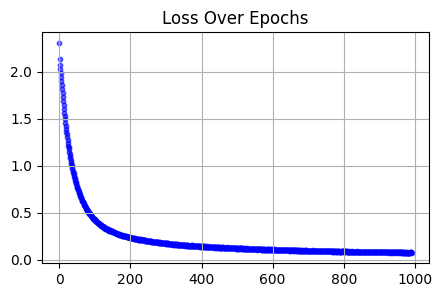

In [2]:
from loss import LOSS

x_values = list(range(len(LOSS)))
plt.figure(figsize=(5, 3))
plt.title('Loss Over Epochs')
plt.scatter(x_values, LOSS, s=10, color='blue', alpha=0.6)
plt.grid(True)
plt.show()


#### Neural_Net.py

Provides `CubeSolverNet`, the deep learning neural network class, and functions to encode and decode the data.

After some testing, I found that the most effective approach was to use 2 hidden layers, and use BatchNorm1d (to stabilize training) and Dropout (to improve generalization).

In [3]:
from neural_net import CubeSolverNet
print(CubeSolverNet())

CubeSolverNet(
  (fc1): Linear(in_features=324, out_features=512, bias=True)
  (bn1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc2): Linear(in_features=512, out_features=256, bias=True)
  (bn2): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.3, inplace=False)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc4): Linear(in_features=128, out_features=12, bias=True)
)


#### Cube.py 

Provides a `cube` class, which contains methods for storing a Rubik's Cube's state, scrambling it, and moving it along a sequence of moves. 

#### Cube_Renderer.py

Responsible for rendering a `cube` object to the terminal.

In [4]:
print("Rubik's Cube")
cube = Cube()
print(cube)

sleep(1)
clear_output(wait=True)
print("Scrambled Rubik's Cube")
cube.scramble()
print(cube)


Scrambled Rubik's Cube
       ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 



#### Solve_Cube.py

Generate a randomly scrambled Rubik's Cube and solve it using a trained model, using (by default) beam search. 

Provides functions to solve a cube using the trained model.

#### Solve_Cube_Tui.py

Uses functions from `solve_cube.py` to solve a generated cube and display the solving process in a nice format to terminal.

<hr>

## Results 

The AI model was effective in solving Rubiks Cubes up to around 10 scrambles. With more scrambles, the model is unlikely to converge on a solution. The biggest difficulty in this project is the plateau of the loss function. This could be remedied by integrating different AI types (such as a DQN), a better search algorithm (like A*), by improving the optimization/loss function, adding an lr_scheduler to prevent plateau, or by using faster hardware to compute more data.

Try out the AI model below. Experiment with different scramble moves, different search methods etc. (these parameters can be configured in solve_cube_tui and solve_cube)

> Two other trained models, `cube_solver_model_v2.pth` and `cube_solver_model_v3.pth` are also provided, which were trained to different parameters. You can try them out by renaming them `cube_solver_model.pth`. 

In [6]:
import solve_cube_tui

solve_cube_tui.main(notebook=True)

Solved!
       ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
■ ■ ■  ■ ■ ■  ■ ■ ■  ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 
       ■ ■ ■ 

